In [12]:
from bs4 import BeautifulSoup
import requests

In [13]:
url = 'https://books.toscrape.com/catalogue/page-{}.html'
books_page = [] 

In [14]:
# Loop through the first 50 pages
for page in range(1, 51):
    print(f"Scraping page {page}...")
    url = url.format(page)
    response = requests.get(url)
    
    if response.status_code != 200:
        print(f"Failed to fetch page {page}")
        continue

    soup = BeautifulSoup(response.text, 'html.parser')
    books = soup.find_all('article', class_='product_pod')
    
    for book in books:
        # Extract the book title
        title = book.h3.a['title']
        
        # Extract the book price
        price = book.find('p', class_='price_color').text.strip('Â£')
        
        # Extract the book rating
        rating = book.find('p')['class'][1]
        
        # Extract the availability
        availability = book.find('p', class_='instock availability').text.strip()
        
        # Append the data to the list
        books_page.append({
            "Title": title,
            "Price": price,
            "Rating": rating,
            "Availability": availability
        })


Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...


In [19]:
import pandas as pd
books_df = pd.DataFrame(books_page)
books_df.head()

,Title,Price,Rating,Availability
0,A Light in the Attic,51.77,Three,In stock
1,Tipping the Velvet,53.74,One,In stock
2,Soumission,50.10,One,In stock
3,Sharp Objects,47.82,Four,In stock
4,Sapiens: A Brief History of Humankind,54.23,Five,In stock


In [21]:
books_df.columns

Index(['Title', 'Price', 'Rating', 'Availability'], dtype='object')

In [24]:
ratings = {    "One": 1,
    "Two": 2,
    "Three": 3,
    "Four": 4,
    "Five": 5}
books_df['Numeric Rating'] = books_df['Rating'].map(ratings)
high_rated_books = books_df[books_df['Numeric Rating'] > 3]
num_high_rated_books = len(high_rated_books)
print(f"Number of books with a rating greater than three: {num_high_rated_books}")

Number of books with a rating greater than three: 400


In [25]:
total_books = len(books_df)
print(f"Total number of books: {total_books}")

Total number of books: 1000


In [26]:
low_rated_books = books_df[books_df['Numeric Rating'] < 3]
num_low_rated_books = len(low_rated_books)
print(f"Number of books with a rating lesser than three: {num_low_rated_books}")

Number of books with a rating lesser than three: 450


In [27]:
import matplotlib.pyplot as plt

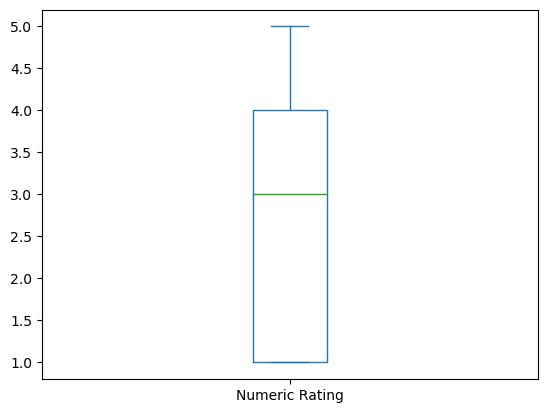

In [33]:
books_df.plot.box()
plt.show()

In [34]:
books_df['Price'] = books_df['Price'].astype(float)


In [35]:
books_df['Stock Count'] = books_df['Availability'].str.extract(r'(\d+)').fillna(0).astype(int)


<Axes: title={'center': 'Price Distribution'}, ylabel='Frequency'>

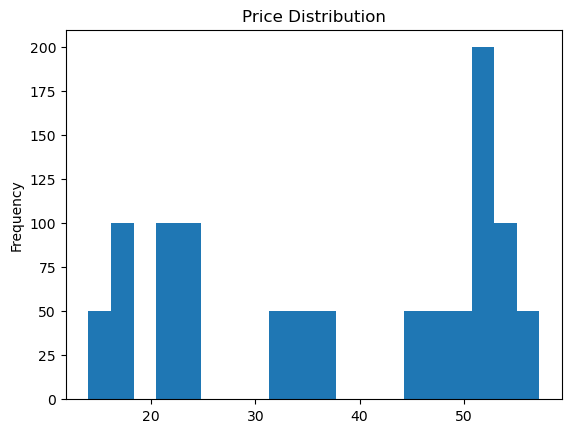

In [36]:
books_df['Price'].plot.hist(bins=20, title='Price Distribution')


In [37]:
rating_counts = books_df['Rating'].value_counts()
print(rating_counts)


Rating
One      300
Four     200
Five     200
Three    150
Two      150
Name: count, dtype: int64


In [38]:
avg_price_by_rating = books_df.groupby('Rating')['Price'].mean()
print(avg_price_by_rating)


Rating
Five     39.750000
Four     31.105000
One      40.018333
Three    42.316667
Two      36.830000
Name: Price, dtype: float64


In [39]:
in_stock = books_df[books_df['Stock Count'] > 0].shape[0]
out_of_stock = books_df[books_df['Stock Count'] == 0].shape[0]
print(f"In stock: {in_stock}, Out of stock: {out_of_stock}")


In stock: 0, Out of stock: 1000


In [40]:
bins = [0, 10, 20, 50, 100]
labels = ['Cheap', 'Affordable', 'Expensive', 'Luxury']
books_df['Price Category'] = pd.cut(books_df['Price'], bins=bins, labels=labels)


In [41]:
books_df['Is Available'] = books_df['Stock Count'] > 0


<Axes: xlabel='Rating', ylabel='Price'>

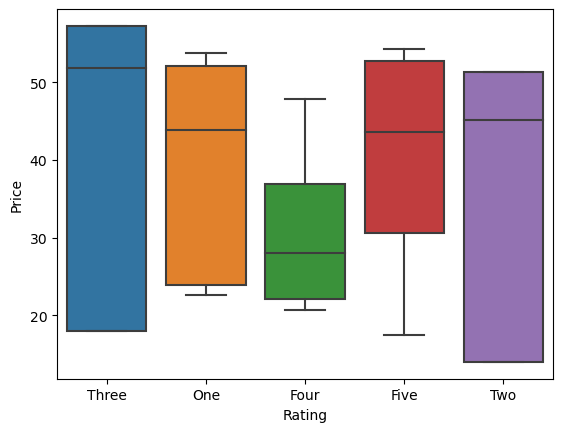

In [42]:
import seaborn as sns
sns.boxplot(x='Rating', y='Price', data=books_df)


<Axes: title={'center': 'Books by Price Category'}, xlabel='Price Category'>

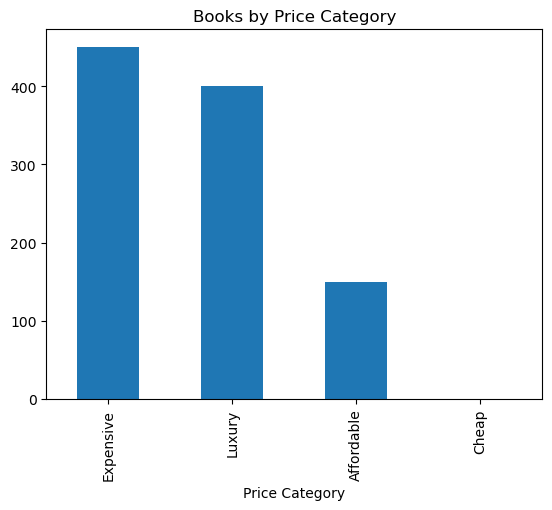

In [43]:
books_df['Price Category'].value_counts().plot(kind='bar', title='Books by Price Category')


In [46]:
books_df.to_csv('books.csv', index=False)
